## *BUSINESS PROBLEM* ##

A company runs marketing campaigns across multiple channels such as Email, SMS, and Social Media.

However, the data collected from these campaigns is inconsistent, incomplete, and unstandardized, making it difficult to measure performance accurately.


Best campaign type by ROI

CTR by region

Conversion Rate by age group

Total conversions by area

High-cost vs high-return campaigns

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\marketing_campaign_data.csv")
df



campaign_id campaign_type    start_date      end_date impressions  \
0          CMP3063           NaN    2023-08-08           NaN       5,000   
1          CMP5101         EMAIL  Oct 14, 2023  Jan 11, 2023         10k   
2          CMP1176  Social Media           NaN           NaN         10k   
3          CMP7713         email    02-03-2023           NaN       5,000   
4          CMP5973         EMAIL           NaN  May 03, 2023         NaN   
...            ...           ...           ...           ...         ...   
157495     CMP4605         EMAIL           NaN           NaN       19135   
157496     CMP8612        social           NaN    20/10/2023        2051   
157497     CMP5198           SMS    12-06-2023    03-25-2023        9556   
157498     CMP6552         Email           NaN    2023-01-13         NaN   
157499     CMP3227           sms    19/02/2023           NaN       5,000   

       clicks  conversions   cost revenue  customer_age customer_gender region  
0        3225        780.0    704  $14270           NaN            Male   nort  
1          2k        843.0  $3624    5063           NaN             NaN   EAST  
2        4392          NaN   1442     NaN           NaN               F   west  
3         100          NaN    NaN   10908          56.0               M  south  
4         NaN        509.0   9048  $14934          47.0               M  North  
...       ...          ...    ...     ...           ...             ...    ...  
157495   4689         85.0  $3061     NaN          41.0            Male   nort  
157496    100        134.0   3179    2337           NaN               M   west  
157497    815        391.0  $4612     NaN           NaN            Male  North  
157498    100        225.0    NaN  $12125           NaN               F    NaN  
157499   4739          NaN  $6802   12521           NaN               M  North  

[157500 rows x 12 columns]

campaign_id: Unique identifier for each advertising campaign

campaign_type: Category or format of the campaign 

start_date: Date when the campaign begins

end_date: Date when the campaign ends

impressions: Number of times the ad is shown to users

clicks: Number of times users click on the ad

conversions: Number of desired actions completed (e.g., purchase, signup)

cost: Total amount spent on the campaign

revenue: Total income generated from the campaign

customer_age: Age of the customer 

customer_gender: Gender of the customer

region: Geographic location of the customer 

In [4]:
df.shape

(157500, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157500 entries, 0 to 157499
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   campaign_id      157500 non-null  object 
 1   campaign_type    137684 non-null  object 
 2   start_date       78840 non-null   object 
 3   end_date         78801 non-null   object 
 4   impressions      118050 non-null  object 
 5   clicks           118172 non-null  object 
 6   conversions      79327 non-null   float64
 7   cost             104587 non-null  object 
 8   revenue          105182 non-null  object 
 9   customer_age     78649 non-null   float64
 10  customer_gender  125823 non-null  object 
 11  region           131433 non-null  object 
dtypes: float64(2), object(10)
memory usage: 14.4+ MB


In [6]:
df.columns.to_list()

['campaign_id',
 'campaign_type',
 'start_date',
 'end_date',
 'impressions',
 'clicks',
 'conversions',
 'cost',
 'revenue',
 'customer_age',
 'customer_gender',
 'region']

In [7]:
df["campaign_type"].unique()

array([nan, 'EMAIL', 'Social Media', 'email', 'sms', 'Email', 'social',
       'SMS'], dtype=object)

In [8]:
df["start_date"].unique()

array(['2023-08-08', 'Oct 14, 2023', nan, ..., '2023-10-25', '12/03/2023',
       '07-17-2023'], dtype=object)

In [9]:
df["end_date"].unique()

array([nan, 'Jan 11, 2023', 'May 03, 2023', ..., '14/07/2023',
       '22/02/2023', '26/11/2023'], dtype=object)

In [10]:
df["impressions"].unique()

array(['5,000', '10k', nan, ..., '71189', '82537', '58302'], dtype=object)

In [11]:
df["conversions"].unique()

array([780., 843.,  nan, ..., 945.,  40.,  53.])

In [12]:
df["clicks"].unique()

array(['3225', '2k', '4392', ..., '2581', '3055', '4331'], dtype=object)

In [13]:
df["cost"].unique()


array(['704', '$3624', '1442', ..., '$557', '4960', '$6399'], dtype=object)

In [14]:
df["revenue"].unique()

array(['$14270', '5063', nan, ..., '16013', '10671', '8235'], dtype=object)

In [15]:

df["customer_age"].unique()

array([nan, 56., 47., 32., 46., 50., 42., 55., 40., 26., 49., 67., 19.,
       58., 63., 64., 61., 51., 25., 59., 24., 28., 37., 21., 62., 29.,
       41., 34., 66., 57., 70., 35., 69., 39., 20., 52., 68., 53., 43.,
       38., 33., 23., 27., 44., 54., 22., 45., 36., 65., 18., 60., 31.,
       48., 30.])

In [16]:
df["customer_gender"].unique()

array(['Male', nan, 'F', 'M', 'Female'], dtype=object)

In [17]:
df["customer_gender"].value_counts()

customer_gender
M         31712
F         31639
Female    31255
Male      31217
Name: count, dtype: int64

In [18]:
df["region"].unique()

array(['nort', 'EAST', 'west', 'south', 'North', nan], dtype=object)

In [19]:
df["region"].value_counts()

region
west     26427
EAST     26324
North    26242
south    26222
nort     26218
Name: count, dtype: int64

## **EDA** ##

In [20]:
df.columns

Index(['campaign_id', 'campaign_type', 'start_date', 'end_date', 'impressions',
       'clicks', 'conversions', 'cost', 'revenue', 'customer_age',
       'customer_gender', 'region'],
      dtype='object')

In [21]:
df['cost']=pd.to_numeric(df["cost"],errors='coerce')
df["revenue"]=pd.to_numeric(df["revenue"],errors='coerce')

In [22]:
df["impressions"]=pd.to_numeric(df["impressions"],errors='coerce')
df["clicks"]=pd.to_numeric(df["clicks"],errors='coerce')
df["conversions"]=pd.to_numeric(df["conversions"],errors='coerce')

In [23]:
continuous_cols=['cost', 'revenue', 'customer_age']
count_cols=[ 'impressions','clicks', 'conversions']
categorical_cols=['campaign_id', 'campaign_type','customer_gender', 'region']

In [24]:
continuous_cols=['cost', 'revenue', 'customer_age']
df[continuous_cols].describe()

cost       revenue  customer_age
count  52269.000000  52902.000000  78649.000000
mean    5050.995753  10102.404162     44.053300
std     2857.061265   5711.733339     15.286711
min      100.000000    200.000000     18.000000
25%     2578.000000   5181.250000     31.000000
50%     5071.000000  10113.500000     44.000000
75%     7525.000000  15069.000000     57.000000
max    10000.000000  20000.000000     70.000000

In [25]:
df[categorical_cols].describe()

campaign_id campaign_type customer_gender  region
count       157500        137684          125823  131433
unique        9000             7               4       5
top        CMP5360           sms               M    west
freq            36         19940           31712   26427

In [26]:
df[count_cols].describe()

impressions        clicks   conversions
count  39409.000000  79008.000000  79327.000000
mean   49920.336700   1296.907035    497.828558
std    28922.245143   1575.461042    289.111353
min        0.000000      0.000000      0.000000
25%    24822.000000    100.000000    248.000000
50%    49938.000000    100.000000    497.000000
75%    74977.000000   2479.000000    747.000000
max    99989.000000   5000.000000   1000.000000

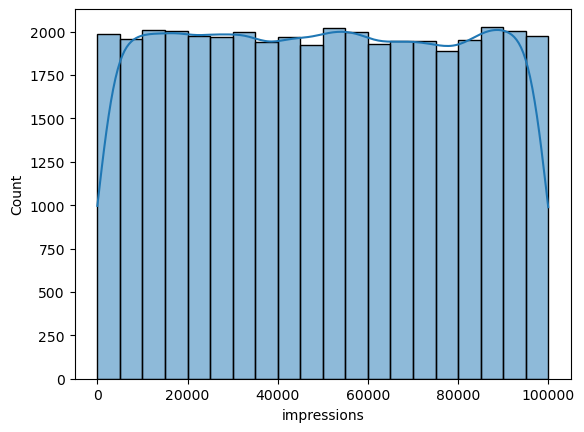

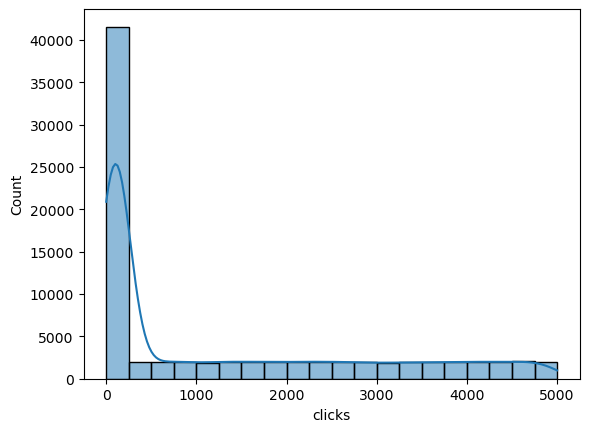

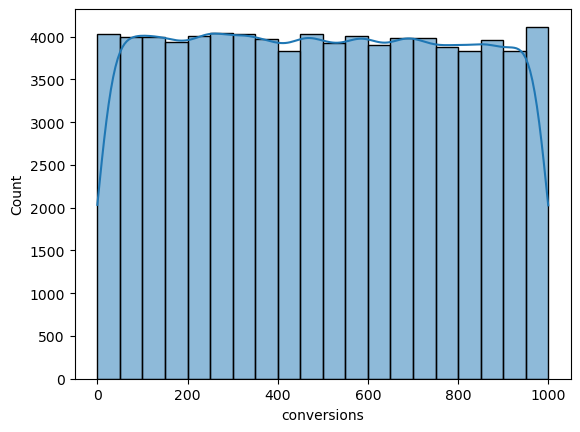

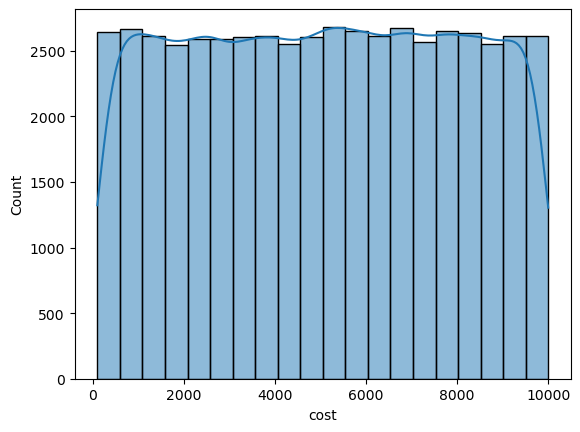

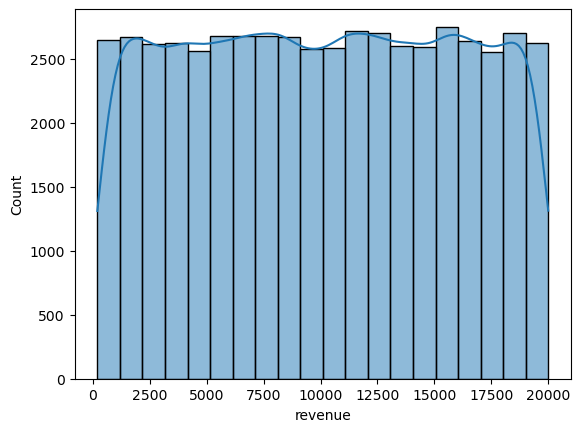

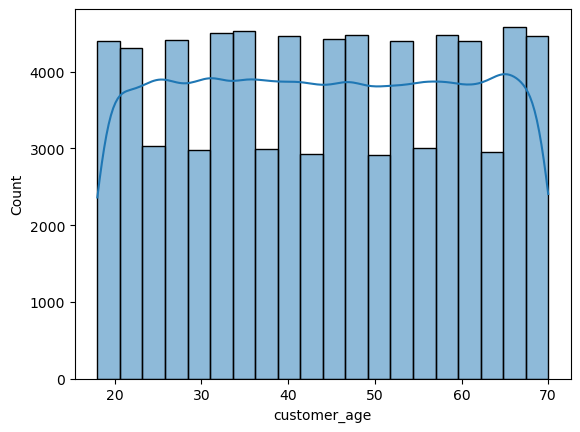

In [27]:
continuous_cols= df.select_dtypes(include=['int32', 'float64']).columns

#  Create boxplots using a loop
for col in continuous_cols:
    # size for each chart
    sns.histplot(df[col],bins=20,kde=True)   # boxplot
    plt.show()

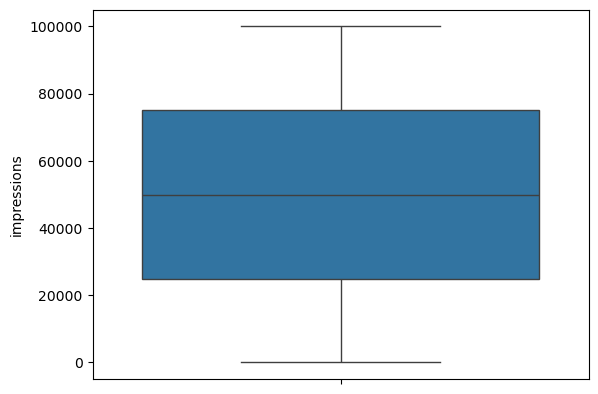

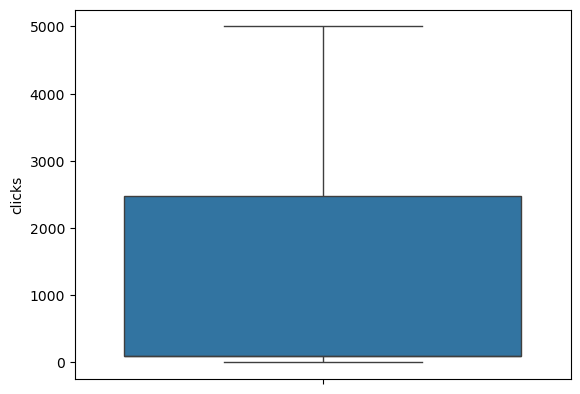

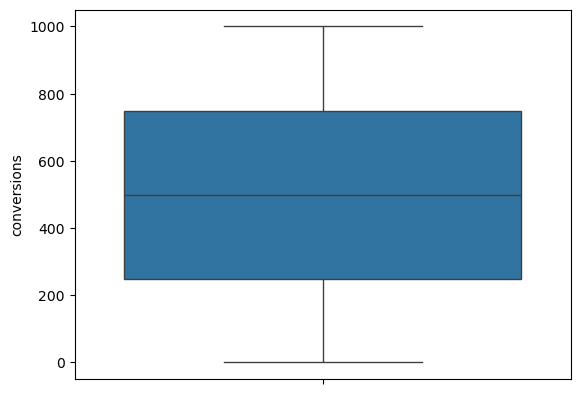

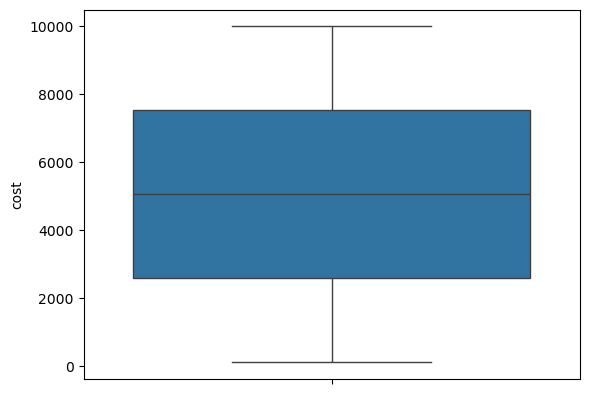

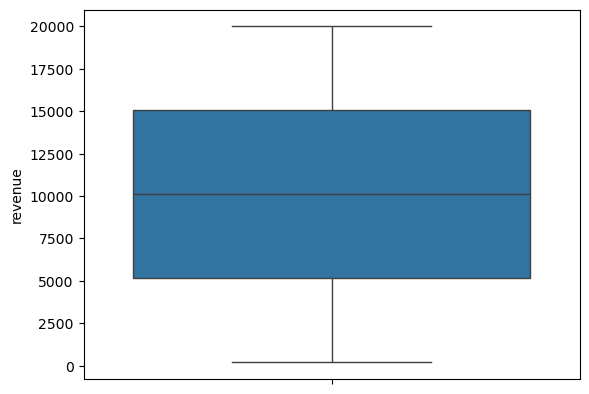

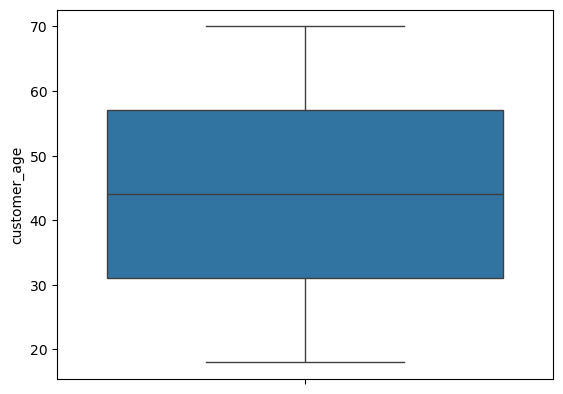

In [28]:
for col in continuous_cols:
    sns.boxplot(df[col])
    plt.show()

In [29]:
df.isnull().sum()

campaign_id             0
campaign_type       19816
start_date          78660
end_date            78699
impressions        118091
clicks              78492
conversions         78173
cost               105231
revenue            104598
customer_age        78851
customer_gender     31677
region              26067
dtype: int64

In [30]:
numeric_cols=df.select_dtypes(include=["Float64"]).columns
for col in numeric_cols:
    q1= df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower=q1 - 1.5*iqr
    upper=q3+ 1.5 *iqr

    df[col]=df[col].clip(lower,upper)
    print(f"Outliers handled for column: {col}")


    print(f" iqr:{iqr}")
    print("lower:",lower)
    print("upper:",upper)
    outliers_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]

    print(f"{col} → Outliers: {outliers_count}")


Outliers handled for column: impressions
 iqr:50155.0
lower: -50410.5
upper: 150209.5
impressions → Outliers: 0
Outliers handled for column: clicks
 iqr:2379.0
lower: -3468.5
upper: 6047.5
clicks → Outliers: 0
Outliers handled for column: conversions
 iqr:499.0
lower: -500.5
upper: 1495.5
conversions → Outliers: 0
Outliers handled for column: cost
 iqr:4947.0
lower: -4842.5
upper: 14945.5
cost → Outliers: 0
Outliers handled for column: revenue
 iqr:9887.75
lower: -9650.375
upper: 29900.625
revenue → Outliers: 0
Outliers handled for column: customer_age
 iqr:26.0
lower: -8.0
upper: 96.0
customer_age → Outliers: 0


In [31]:
df.dtypes

campaign_id         object
campaign_type       object
start_date          object
end_date            object
impressions        float64
clicks             float64
conversions        float64
cost               float64
revenue            float64
customer_age       float64
customer_gender     object
region              object
dtype: object

In [32]:
df[continuous_cols].skew()

impressions     0.006300
clicks          0.966152
conversions     0.011225
cost           -0.005387
revenue        -0.001102
customer_age    0.000830
dtype: float64

The data is largely normally distributed, with slight left skew in cost and revenue and moderate right skew in clicks.

In [33]:
df[continuous_cols].corr()

impressions    clicks  conversions      cost   revenue  \
impressions      1.000000 -0.016830     0.001835 -0.003051 -0.005315   
clicks          -0.016830  1.000000     0.001931 -0.000425 -0.003226   
conversions      0.001835  0.001931     1.000000 -0.001556 -0.006726   
cost            -0.003051 -0.000425    -0.001556  1.000000  0.009901   
revenue         -0.005315 -0.003226    -0.006726  0.009901  1.000000   
customer_age     0.004094 -0.010916     0.009468  0.001157  0.009809   

              customer_age  
impressions       0.004094  
clicks           -0.010916  
conversions       0.009468  
cost              0.001157  
revenue           0.009809  
customer_age      1.000000

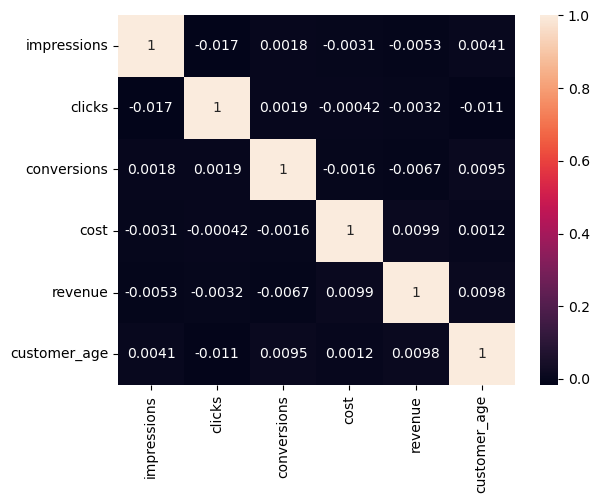

In [34]:
sns.heatmap(df[continuous_cols].corr(),annot=True)
plt.show()

##  *DATA CLEANING* ##

In [35]:
df.shape

(157500, 12)

In [36]:
df.isnull().sum()/len(df)*100

campaign_id         0.000000
campaign_type      12.581587
start_date         49.942857
end_date           49.967619
impressions        74.978413
clicks             49.836190
conversions        49.633651
cost               66.813333
revenue            66.411429
customer_age       50.064127
customer_gender    20.112381
region             16.550476
dtype: float64

In [37]:

df.drop(columns=["start_date","end_date"],inplace=True)

Dropped the columns as the percentage of null values is more 

In [38]:
df["campaign_type"].isnull().sum()

19816

In [39]:
df["campaign_type"]=df["campaign_type"].fillna('Unknown')

filled with unknown category to prevent data integrity

In [40]:
df["campaign_type"].unique()

array(['Unknown', 'EMAIL', 'Social Media', 'email', 'sms', 'Email',
       'social', 'SMS'], dtype=object)

In [41]:
df["campaign_type"]=df["campaign_type"].str.lower()
df["campaign_type"]=df["campaign_type"].replace({
    'email':'Email',
    'sms':'SMS',
    'social media':'Social Media',
    'social':'Social Media'

    
})

In [42]:
df["campaign_type"].unique()

array(['unknown', 'Email', 'Social Media', 'SMS'], dtype=object)

In [43]:
df["impressions"].unique()

array([   nan, 93378., 45107., ..., 71189., 82537., 58302.])

In [44]:
df["impressions"]=df["impressions"].fillna(0)
df["clicks"]=df["clicks"].fillna(0)
df["conversions"]=df["conversions"].fillna(0)

filled the null values with zero as we cant drop it and these are the important columns for the analysis

In [45]:
df[count_cols]=df[count_cols].astype(int)

In [46]:
df.isnull().sum()

campaign_id             0
campaign_type           0
impressions             0
clicks                  0
conversions             0
cost               105231
revenue            104598
customer_age        78851
customer_gender     31677
region              26067
dtype: int64

In [47]:
df.shape

(157500, 10)

In [48]:
df["cost"]=df["cost"].fillna(0)
df["revenue"]=df["revenue"].fillna(0)

filled the null values with zero  to show the actual analysis

In [49]:
df["customer_age"]=df['customer_age'].fillna('unknown')
df["customer_gender"]=df["customer_gender"].fillna('unknown')
df["region"]=df["region"].fillna('unknown')

In [50]:
df["customer_gender"].unique()

array(['Male', 'unknown', 'F', 'M', 'Female'], dtype=object)

In [51]:
df["customer_gender"]=df["customer_gender"].replace({
    'M':'Male',
    'F':'Female'
})

In [52]:
df["region"].unique()

array(['nort', 'EAST', 'west', 'south', 'North', 'unknown'], dtype=object)

In [53]:

df["region"]=df["region"].replace({
    'nort':'North',
    'EAST':'East',
    'west':'West',
    'south':'South'
})

In [54]:
df["region"].unique()

array(['North', 'East', 'West', 'South', 'unknown'], dtype=object)

In [55]:
df.isnull().sum()

campaign_id        0
campaign_type      0
impressions        0
clicks             0
conversions        0
cost               0
revenue            0
customer_age       0
customer_gender    0
region             0
dtype: int64

## *DATA VISUALIZATION* ##

Created new metrics for analysis

CTR : click through rate(Number of people clicked the ad)

Conversion rate : people completed an action(purchase,signup)

ROI : Return on investment (total returns on investment)

In [69]:
roi_campaign=df.groupby("campaign_type")[['cost','revenue']].sum().reset_index()
roi_campaign["ROI"]=(roi_campaign["revenue"]-roi_campaign["cost"]/roi_campaign["cost"])
print(roi_campaign)
fig = px.bar(
    roi_campaign,
    x="ROI",
    y="campaign_type",
    title="Best Campaign Type by ROI",
    color="ROI",
    color_continuous_scale=["red", "blue", "green"]
)



fig.update_layout(
    xaxis_title="ROI(return on investment)",
    yaxis_title="campaign_type",
    hovermode='closest')

fig.show()






  campaign_type        cost      revenue          ROI
0         Email  98932070.0  201005001.0  201005000.0
1           SMS  66791332.0  134417443.0  134417442.0
2  Social Media  65478347.0  131623640.0  131623639.0
3       unknown  32808748.0   67391301.0   67391300.0


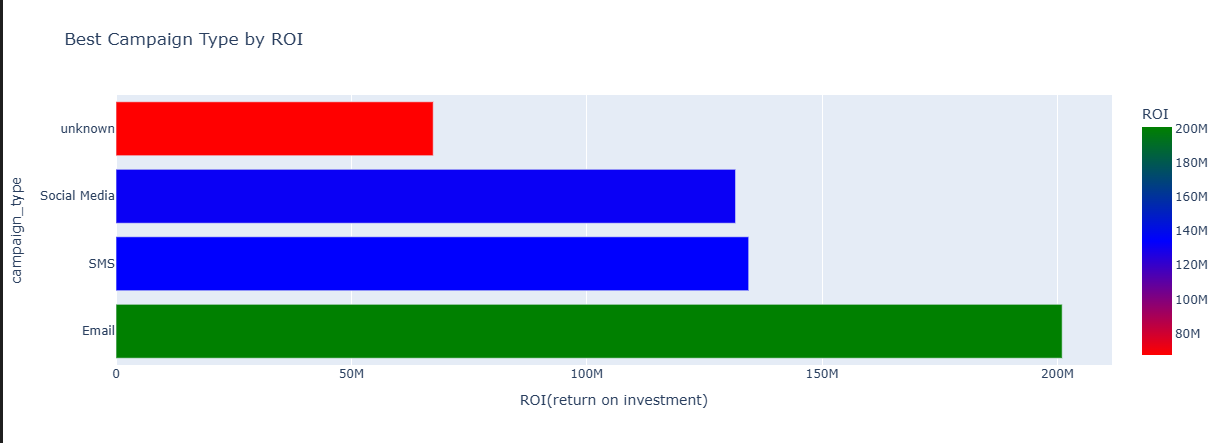

Insights:

Email has the highest ROI above 200 million.

Social media and SMS has the relatively same value of ROI.

Focusing budget on Email campaigns can increase in overall returns.

In [58]:
region_ctr=df.groupby("region")[["clicks","impressions"]].sum().reset_index()
region_ctr["CTR"]=(region_ctr["clicks"]/region_ctr["impressions"])
fig=px.bar(region_ctr,
           x="CTR",
           y='region',
           title="CTR by region",
           color="CTR",
           color_continuous_scale=["red","green","blue","orange"])

fig.update_layout(
    xaxis_title="CTR",
    yaxis_title="region"
)
fig.show()


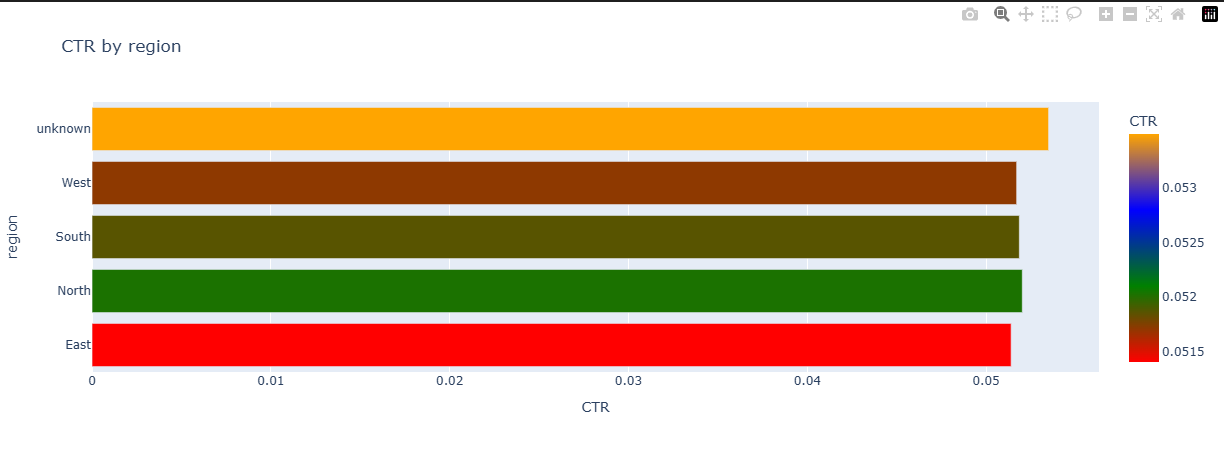

Insights:

CTR ranges between 0.0515 - 0.053.

 CTR values across all regions has minor variations,unknown category has the highest CTR compared to other regions.

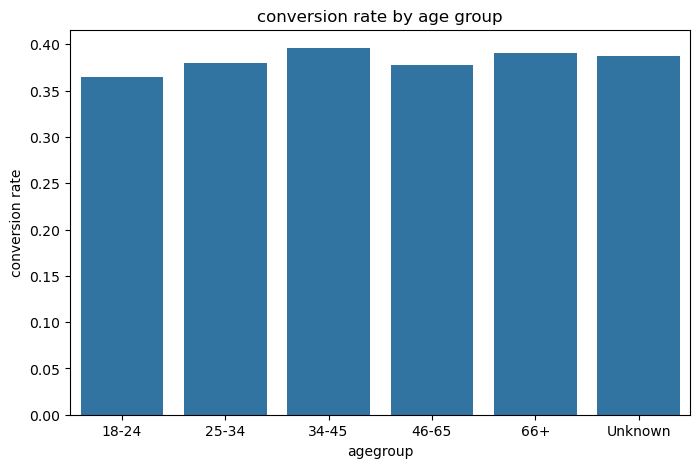

In [59]:
df["customer_age"]=pd.to_numeric(df["customer_age"],errors='coerce')
df["age_group"]=pd.cut(df["customer_age"],
                       bins=[18,25,35,45,55,66],
                       labels=['18-24','25-34','34-45','46-65','66+'],
                       )
df["age_group"] = (
    df["age_group"]
    .astype("category")      # ensure categorical
    .cat.add_categories("Unknown")
    .fillna("Unknown"))

con_age=df.groupby("age_group")[["clicks","conversions"]].sum().reset_index()
con_age["conversion_rate"]=(con_age["conversions"]/con_age["clicks"])

plt.figure(figsize=(8,5))
sns.barplot(data=con_age,
            x="age_group",
            y="conversion_rate")
plt.title("conversion rate by age group")
plt.xlabel("agegroup")
plt.ylabel("conversion rate")
plt.show()



Insights:

Age group of 34-45 has the highest conversion rate.  

All of the other columns has the minimal variations compared to each other.

In [60]:
con_can=df.groupby("campaign_type")["conversions"].sum().reset_index()
print(con_can)
fig=px.bar(
    con_can,
    x="campaign_type",
    y="conversions",
    title="Total conversions by campaign type"
    
)
fig.show()

  campaign_type  conversions
0         Email     14704906
1           SMS      9933774
2  Social Media      9871770
3       unknown      4980796


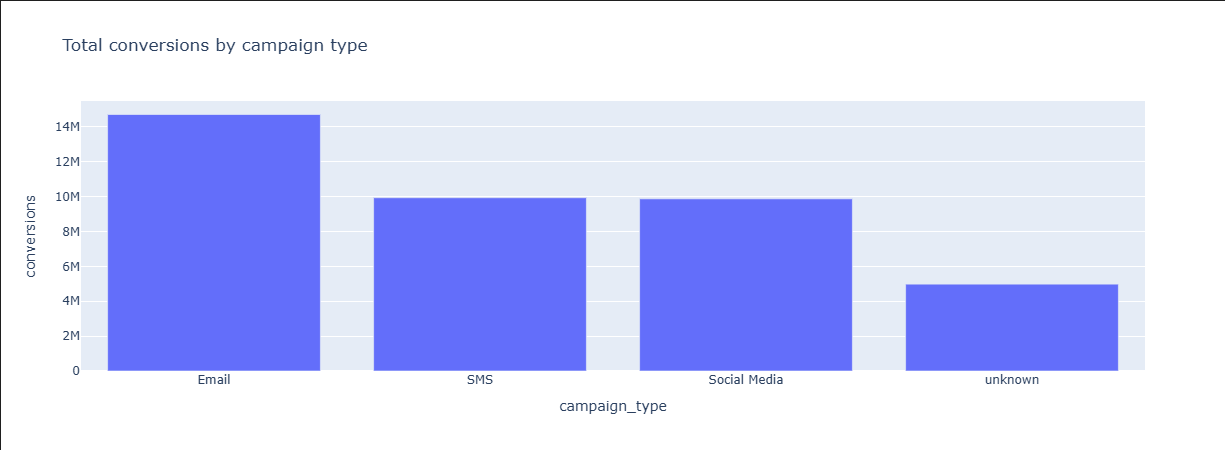

Insights:

Email campaign has the highest conversions with approximately 15 million.

SMS and Social media has generate close to 10 million.

unknown campaign has the lowest conversions close to 5 million ,which shows incomplete data.

In [61]:
con_reg=df.groupby("region")["conversions"].sum().reset_index()
print(con_reg)
fig=px.bar(
    con_reg,
    x="region",
    y="conversions",
    hover_data={
        "conversions":True,
        "region":True
    },title="Total conversions by Region",
    color="region"
    )


fig.update_layout(
    xaxis_title="region",
    yaxis_title="conversions",
    hovermode='closest'
)



    region  conversions
0     East      6517242
1    North     13259079
2    South      6550436
3     West      6654974
4  unknown      6509515


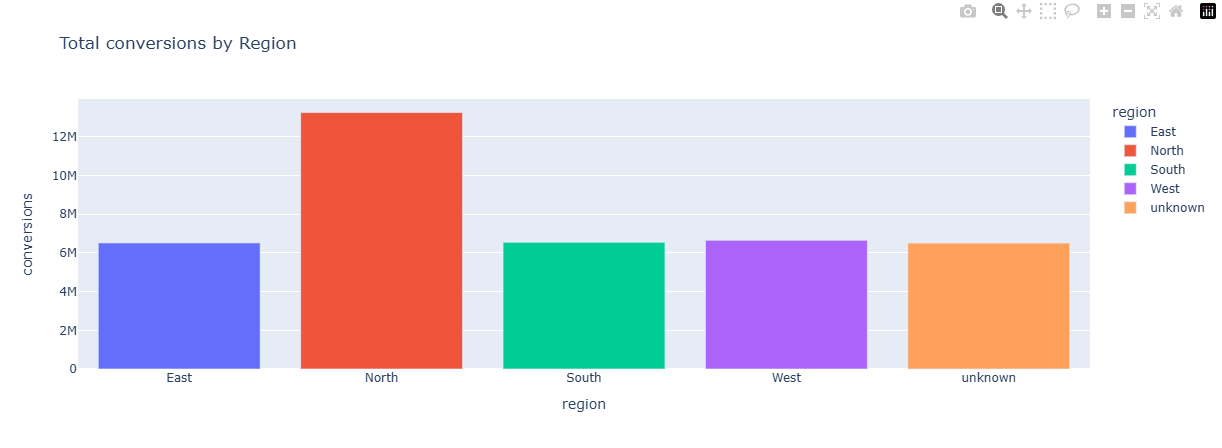

Insights:

North region has the highest conversions,which shows the higher customer engagement in that region.

East,South,West,Unknown regions shows the same conversions level,suggesting relatively balanced performance among them.

In [62]:
ret_rev=df.groupby(["campaign_id","campaign_type"],as_index=False).agg({"cost":sum,"revenue":sum})
fig= px.scatter(
    ret_rev,
    x="cost",
    y="revenue",
    hover_data={
        "campaign_id": True,
        "campaign_type": True,
        "cost": ':.2f',
        "revenue": ':.2f'
    },
    title="High Cost vs High Returns",
    color="revenue"
)


fig.update_layout(
    xaxis_title="cost",
    yaxis_title="revenue",
    hovermode='closest'
)

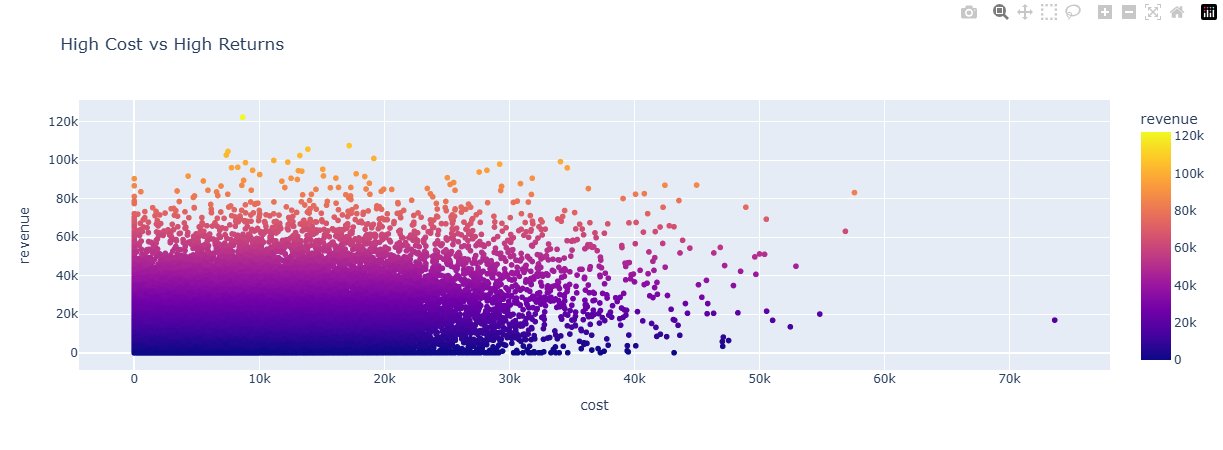

Insights:

Most campaigns with low to medium cost generate good revenue.

When campaign cost increases, revenue does not increase consistently.

Only a few campaigns achieve both high cost and high revenue.

In [63]:
region_age=df.groupby(["region","age_group"]).size().reset_index(name='count')

fig=px.bar(
    region_age,
    x="region",
    y="count",
    color='age_group',
    hover_data={
        'region':True,
        "age_group":True,
        'count':True},
    title="Respond of age group by region")
fig.update_layout(
    xaxis_title="region",
    yaxis_title="agegroup",
    hovermode='closest'
)

fig.show()


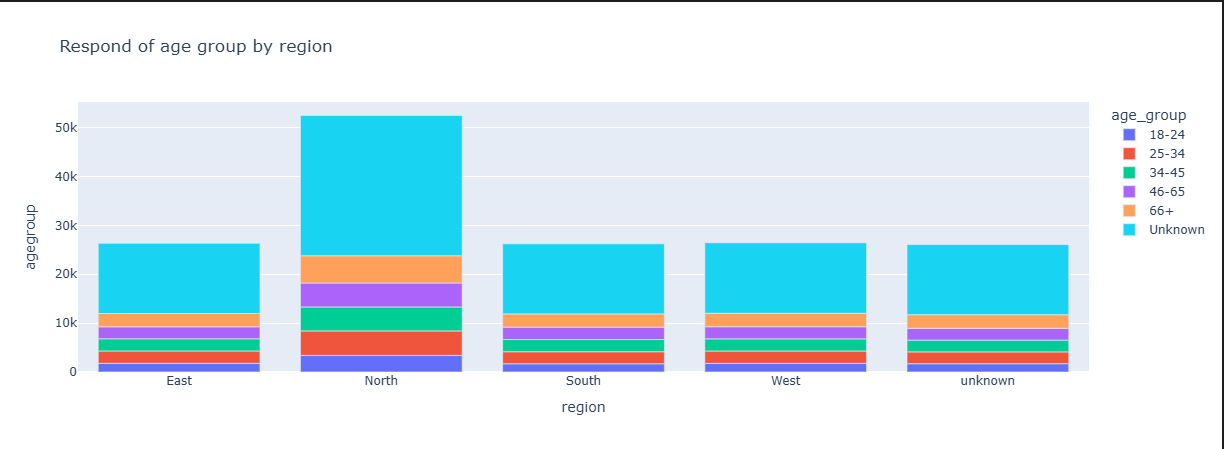

Insights:

North region has the highest customer engagement.

Age group of 25-34 and 34-45 has the more responses across all regions.

Age group of 18-24 and 66+ shows relatively smaller contributions across all regions.

unknown segment forms the largest portion of each bar.

In [64]:
campaign_gen=df.groupby(["campaign_type","customer_gender"]).size().reset_index(name='count')

fig=px.bar(
    campaign_gen,
    x="campaign_type",
    y='count',
    color="customer_gender",
    hover_data={
        "campaign_type":True,
        "customer_gender":True,
        "count":True
    },title="campaign type respond by gender"
)
fig.show()

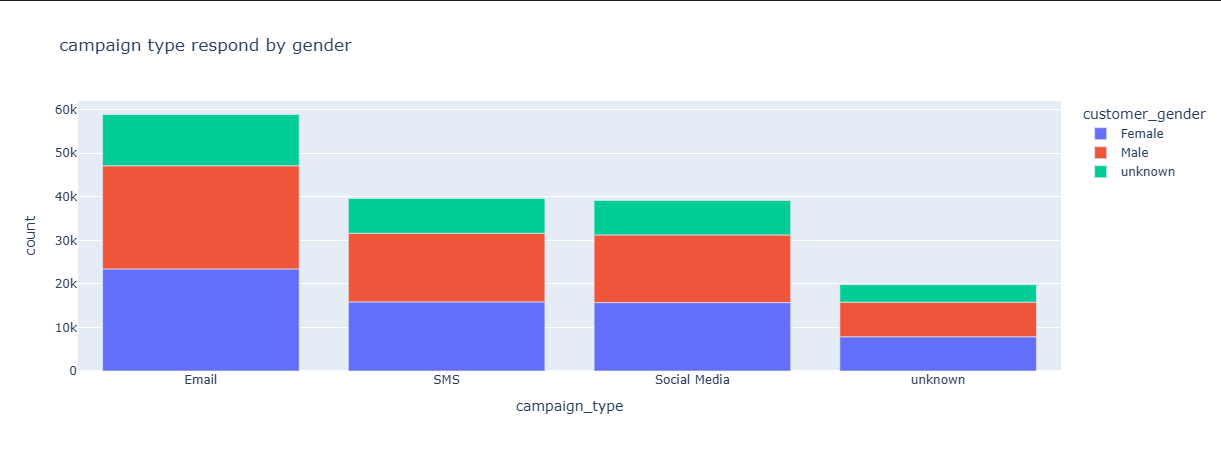

Insights:

Email campaign has the highest engagement across genders.

For Email,SMS,Social media, Male and Female counts are close,suggesting campaigns are gender-neutral in appeal.

No strong gender bias is observed in campaign performance.

## **SUMMARY** ##





The analysis shows that Email campaigns consistently outperform other channels, delivering the highest ROI, conversions, and engagement across genders. North region and the 25–45 age group drive the strongest customer engagement, while campaign performance remains balanced across most regions and genders. Overall,low-to-medium cost campaigns generate better returns, but data quality gaps (unknown age, region, and campaign type) limit deeper insights and highlight areas for improvement.Focusing on the budget of Email can increase in overall returns.


In [65]:
df.to_csv("campaign_cleaned.csv",index=False)